In [1]:
import seaborn as sns  
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tts 
from sklearn.svm import LinearSVR as lsvr

In [2]:
source = "./MICRODADOS_ENEM_2019_SAMPLE_43278.csv"   
dados = pd.read_csv(source)

In [3]:
provas=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]  
provas_entrada= ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]  
provas_saida = "NU_NOTA_MT" 
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)  
provas.append("NU_NOTA_TOTAL")

In [4]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")  
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada] 
notas_saida = dados_sem_notas_zero[provas_saida]

In [5]:
x = notas_entrada 
y = notas_saida

In [6]:
tts(x,y)

[        NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
 115669       352.6       352.1       490.5            360.0
 69052        418.6       366.5       374.0              0.0
 8741         520.7       587.1       546.4            600.0
 98790        365.7       444.6       468.1            560.0
 64868        611.4       586.5       577.5            860.0
 ...            ...         ...         ...              ...
 71770        470.8       609.7       555.4            600.0
 247          497.8       446.9       500.9            700.0
 19293        471.3       549.1       526.7            620.0
 86924        519.2       588.6       585.9            560.0
 34926        659.1       634.3       649.3            840.0
 
 [69402 rows x 4 columns],
         NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
 81764        493.2       581.1       556.1            560.0
 590          502.8       552.8       498.6            580.0
 38805        403.0       563.9       516.9            6

In [7]:
SEED=0
x_treino, x_teste, y_treino,y_teste = tts(x,y, test_size =0.25, random_state = SEED )

In [8]:
x_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
92248,604.4,645.3,595.5,980.0
86057,531.6,558.7,534.3,920.0
55061,512.3,627.6,584.3,880.0
120165,495.4,560.0,534.9,540.0
56853,369.0,533.1,487.3,460.0


In [9]:
modelo = lsvr(random_state = 0,max_iter=1000) 

modelo.fit(x_treino, y_treino)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=0)

In [10]:
predicoes_matematica = modelo.predict(x_teste)

In [11]:
y_teste[:5]

4984      372.7
18022     513.6
93468     602.2
44286     618.7
117917    539.0
Name: NU_NOTA_MT, dtype: float64

<AxesSubplot:ylabel='NU_NOTA_MT'>

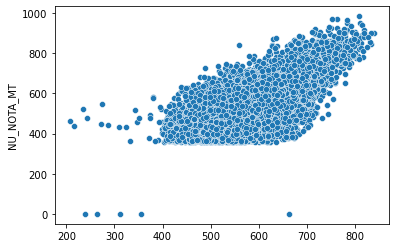

In [13]:
sns.scatterplot(x = predicoes_matematica, y=y_teste)